<a href="https://colab.research.google.com/github/im780/Imran-/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import csv
import random
import math
from datetime import datetime, timedelta
from typing import Iterator, Tuple, List, Dict

print("Setup Complete: Python libraries (csv, math, datetime, random) loaded.")

# --- Configuration ---
NUM_TRANSACTIONS = 50000  # Number of synthetic transactions to generate
NUM_CARDHOLDERS = 300     # Number of unique cardholders
OUTPUT_FILE = "transactions.csv"
FRAUD_RATE = 0.005        # 0.5% chance of a transaction being a massive outlier
POTENTIAL_FRAUD_THRESHOLD = 3.0 # Z-score threshold (3 standard deviations)

# ==============================================================================
# STEP 1: DATA GENERATION (Simulating a large HDFS Input File)
# This function creates the large, synthetic dataset we will analyze.
# ==============================================================================

def generate_data():
    """Generates a large synthetic CSV file for credit card transactions."""
    print(f"\n--- 1. Generating {NUM_TRANSACTIONS} Synthetic Transactions ---")

    # Generate unique card IDs
    card_ids = [f"CARD_{i:04d}" for i in range(1, NUM_CARDHOLDERS + 1)]

    # Simulate a typical transaction distribution for each user
    # Each user has an 'avg' spending and a 'std' deviation for normal behavior
    user_profiles = {
        cid: {
            'avg': random.randint(30, 800),
            'std': random.randint(20, 150)
        }
        for cid in card_ids
    }

    # Transaction date range
    start_date = datetime(2024, 1, 1)

    with open(OUTPUT_FILE, 'w', newline='') as f:
        writer = csv.writer(f)
        # Write Header
        writer.writerow(['transaction_id', 'card_id', 'timestamp', 'amount'])

        for i in range(1, NUM_TRANSACTIONS + 1):
            transaction_id = f"TXN_{i:07d}"
            card_id = random.choice(card_ids)
            profile = user_profiles[card_id]

            # Generate transaction amount
            # Introduce some fraudulent transactions as massive outliers
            if random.random() < FRAUD_RATE:
                # Fraudulent transaction: significantly higher than average
                amount = round(profile['avg'] + profile['std'] * random.uniform(5, 15), 2) # 5 to 15 std deviations out
            else:
                # Normal transaction
                amount = round(random.gauss(profile['avg'], profile['std']), 2)
                # Ensure amount is not negative
                amount = max(0.01, amount)

            # Generate timestamp (within a reasonable range around the start_date)
            # Max 30 days into the future
            timestamp = start_date + timedelta(days=random.randint(0, 29),
                                              hours=random.randint(0, 23),
                                              minutes=random.randint(0, 59),
                                              seconds=random.randint(0, 59))

            writer.writerow([transaction_id, card_id, timestamp.isoformat(), amount])

    print(f"Synthetic transactions saved to {OUTPUT_FILE}")

# Execute data generation
generate_data()

Setup Complete: Python libraries (csv, math, datetime, random) loaded.

--- 1. Generating 50000 Synthetic Transactions ---
Synthetic transactions saved to transactions.csv


In [ ]:
import csv
import random
import math
from datetime import datetime, timedelta
from typing import Iterator, Tuple, List, Dict

print("Setup Complete: Python libraries (csv, math, datetime, random) loaded.")

# --- Configuration ---
NUM_TRANSACTIONS = 50000  # Number of synthetic transactions to generate
NUM_CARDHOLDERS = 300     # Number of unique cardholders
OUTPUT_FILE = "transactions.csv"
FRAUD_RATE = 0.005        # 0.5% chance of a transaction being a massive outlier
POTENTIAL_FRAUD_THRESHOLD = 3.0 # Z-score threshold (3 standard deviations)

# ==============================================================================
# STEP 1: DATA GENERATION (Simulating a large HDFS Input File)
# This function creates the large, synthetic dataset we will analyze.
# ==============================================================================

def generate_data():
    """Generates a large synthetic CSV file for credit card transactions."""
    print(f"\n--- 1. Generating {NUM_TRANSACTIONS} Synthetic Transactions ---")

    # Generate unique card IDs
    card_ids = [f"CARD_{i:04d}" for i in range(1, NUM_CARDHOLDERS + 1)]

    # Simulate a typical transaction distribution for each user
    # Each user has an 'avg' spending and a 'std' deviation for normal behavior
    user_profiles = {
        cid: {
            'avg': random.randint(30, 800),
            'std': random.randint(20, 150)
        }
        for cid in card_ids
    }

    # Transaction date range
    start_date = datetime(2024, 1, 1)

    with open(OUTPUT_FILE, 'w', newline='') as f:
        writer = csv.writer(f)
        # Write Header
        writer.writerow(['transaction_id', 'card_id', 'timestamp', 'amount'])

        for i in range(1, NUM_TRANSACTIONS + 1):
            transaction_id = f"TXN_{i:07d}"
            card_id = random.choice(card_ids)
            profile = user_profiles[card_id]

            # Generate transaction amount
            # Introduce some fraudulent transactions as massive outliers
            if random.random() < FRAUD_RATE:
                # Fraudulent transaction: significantly higher than average
                amount = round(profile['avg'] + profile['std'] * random.uniform(5, 15), 2) # 5 to 15 std deviations out
            else:
                # Normal transaction
                amount = round(random.gauss(profile['avg'], profile['std']), 2)
                # Ensure amount is not negative
                amount = max(0.01, amount)

            # Generate timestamp (within a reasonable range around the start_date)
            # Max 30 days into the future
            timestamp = start_date + timedelta(days=random.randint(0, 29),
                                              hours=random.randint(0, 23),
                                              minutes=random.randint(0, 59),
                                              seconds=random.randint(0, 59))

            writer.writerow([transaction_id, card_id, timestamp.isoformat(), amount])

    print(f"Synthetic transactions saved to {OUTPUT_FILE}")

# Execute data generation
generate_data()

Setup Complete: Python libraries (csv, math, datetime, random) loaded.

--- 1. Generating 50000 Synthetic Transactions ---
Synthetic transactions saved to transactions.csv


In [ ]:
import csv
import random
import math
from datetime import datetime, timedelta
from typing import Iterator, Tuple, List, Dict

print("Setup Complete: Python libraries (csv, math, datetime, random) loaded.")

# --- Configuration ---
NUM_TRANSACTIONS = 50000  # Number of synthetic transactions to generate
NUM_CARDHOLDERS = 300     # Number of unique cardholders
OUTPUT_FILE = "transactions.csv"
FRAUD_RATE = 0.005        # 0.5% chance of a transaction being a massive outlier
POTENTIAL_FRAUD_THRESHOLD = 3.0 # Z-score threshold (3 standard deviations)

# ==============================================================================
# STEP 1: DATA GENERATION (Simulating a large HDFS Input File)
# This function creates the large, synthetic dataset we will analyze.
# ==============================================================================

def generate_data():
    """Generates a large synthetic CSV file for credit card transactions."""
    print(f"\n--- 1. Generating {NUM_TRANSACTIONS} Synthetic Transactions ---")

    # Generate unique card IDs
    card_ids = [f"CARD_{i:04d}" for i in range(1, NUM_CARDHOLDERS + 1)]

    # Simulate a typical transaction distribution for each user
    # Each user has an 'avg' spending and a 'std' deviation for normal behavior
    user_profiles = {
        cid: {
            'avg': random.randint(30, 800),
            'std': random.randint(20, 150)
        }
        for cid in card_ids
    }

    # Transaction date range
    start_date = datetime(2024, 1, 1)

    with open(OUTPUT_FILE, 'w', newline='') as f:
        writer = csv.writer(f)
        # Write Header
        writer.writerow(['transaction_id', 'card_id', 'timestamp', 'amount'])

        for i in range(1, NUM_TRANSACTIONS + 1):
            transaction_id = f"TXN_{i:07d}"
            card_id = random.choice(card_ids)
            profile = user_profiles[card_id]

            # Generate transaction amount
            # Introduce some fraudulent transactions as massive outliers
            if random.random() < FRAUD_RATE:
                # Fraudulent transaction: significantly higher than average
                amount = round(profile['avg'] + profile['std'] * random.uniform(5, 15), 2) # 5 to 15 std deviations out
            else:
                # Normal transaction
                amount = round(random.gauss(profile['avg'], profile['std']), 2)
                # Ensure amount is not negative
                amount = max(0.01, amount)

            # Generate timestamp (within a reasonable range around the start_date)
            # Max 30 days into the future
            timestamp = start_date + timedelta(days=random.randint(0, 29),
                                              hours=random.randint(0, 23),
                                              minutes=random.randint(0, 59),
                                              seconds=random.randint(0, 59))

            writer.writerow([transaction_id, card_id, timestamp.isoformat(), amount])

    print(f"Synthetic transactions saved to {OUTPUT_FILE}")

# Execute data generation
generate_data()

Setup Complete: Python libraries (csv, math, datetime, random) loaded.

--- 1. Generating 50000 Synthetic Transactions ---
Synthetic transactions saved to transactions.csv


# Task
Load the generated "transactions.csv" file, parse each row to extract 'card_id', 'timestamp', and 'amount', and store them in a suitable data structure for further processing.

## Load Transactions

### Subtask:
Load the generated 'transactions.csv' file, parse each row to extract 'card_id', 'timestamp', and 'amount', and store them in a suitable data structure for further processing.


**Reasoning**:
The subtask requires loading the `transactions.csv` file, parsing each row, and storing the extracted data into a list of dictionaries. The provided instructions detail the exact steps to achieve this, including initializing a list, opening the file, using `csv.DictReader`, iterating through rows, and converting data types.



In [ ]:
transactions_data = []

print(f"\n--- 2. Loading and Parsing Transactions from {OUTPUT_FILE} ---")

with open(OUTPUT_FILE, 'r', newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        card_id = row['card_id']
        timestamp_str = row['timestamp']
        amount_str = row['amount']

        parsed_timestamp = datetime.fromisoformat(timestamp_str)
        parsed_amount = float(amount_str)

        transactions_data.append({
            'card_id': card_id,
            'timestamp': parsed_timestamp,
            'amount': parsed_amount
        })

print(f"Loaded {len(transactions_data)} transactions into 'transactions_data' list.")


--- 2. Loading and Parsing Transactions from transactions.csv ---
Loaded 50000 transactions into 'transactions_data' list.


## Calculate Cardholder Statistics

### Subtask:
For each unique cardholder, calculate their average transaction amount and the standard deviation of their transaction amounts. These statistics will be used as a baseline for detecting anomalies.


**Reasoning**:
The subtask requires calculating the average and standard deviation of transaction amounts for each cardholder. I will first import the `statistics` module, then iterate through the `transactions_data` to group amounts by cardholder, and finally compute the required statistics while handling edge cases for standard deviation, storing them in `cardholder_stats`.



In [ ]:
import statistics
from collections import defaultdict

cardholder_stats = {}

# Group transaction amounts by card_id
transactions_by_card = defaultdict(list)
for transaction in transactions_data:
    transactions_by_card[transaction['card_id']].append(transaction['amount'])

print(f"\n--- 3. Calculating Statistics for {len(transactions_by_card)} Cardholders ---")

# Calculate mean and standard deviation for each cardholder
for card_id, amounts in transactions_by_card.items():
    mean_amount = math.fmean(amounts)

    # Handle case for single transaction or identical amounts for standard deviation
    if len(amounts) > 1:
        std_dev = statistics.stdev(amounts)
    else:
        std_dev = 0.0 # Standard deviation for a single data point is 0

    cardholder_stats[card_id] = {
        'mean': mean_amount,
        'std_dev': std_dev
    }

print(f"Calculated average and standard deviation for {len(cardholder_stats)} unique cardholders.")



--- 3. Calculating Statistics for 300 Cardholders ---


AttributeError: module 'math' has no attribute 'fmean'

**Reasoning**:
The previous code failed because `math.fmean` is not available, likely due to an older Python version or a misinterpretation of the available functions. The `statistics` module, which is already imported, provides a `mean()` function that can be used as a direct replacement to calculate the average.



In [ ]:
import statistics
from collections import defaultdict

cardholder_stats = {}

# Group transaction amounts by card_id
transactions_by_card = defaultdict(list)
for transaction in transactions_data:
    transactions_by_card[transaction['card_id']].append(transaction['amount'])

print(f"\n--- 3. Calculating Statistics for {len(transactions_by_card)} Cardholders ---")

# Calculate mean and standard deviation for each cardholder
for card_id, amounts in transactions_by_card.items():
    mean_amount = statistics.mean(amounts)

    # Handle case for single transaction or identical amounts for standard deviation
    if len(amounts) > 1:
        std_dev = statistics.stdev(amounts)
    else:
        std_dev = 0.0 # Standard deviation for a single data point is 0

    cardholder_stats[card_id] = {
        'mean': mean_amount,
        'std_dev': std_dev
    }

print(f"Calculated average and standard deviation for {len(cardholder_stats)} unique cardholders.")


--- 3. Calculating Statistics for 300 Cardholders ---
Calculated average and standard deviation for 300 unique cardholders.


## Calculate Z-Scores and Identify Potential Fraud

### Subtask:
Iterate through all transactions, calculate a Z-score for each transaction amount relative to its cardholder's historical mean and standard deviation, and flag transactions exceeding a predefined Z-score threshold as potential fraud.


**Reasoning**:
The subtask requires iterating through transactions, calculating Z-scores based on cardholder statistics, and flagging transactions that exceed a predefined fraud threshold. I will implement the logic as described in the instructions, including handling the edge case where standard deviation is zero.



In [ ]:
flagged_transactions = []

print(f"\n--- 4. Calculating Z-Scores and Identifying Potential Fraud (Threshold: {POTENTIAL_FRAUD_THRESHOLD}) ---")

for transaction in transactions_data:
    card_id = transaction['card_id']
    amount = transaction['amount']

    # Retrieve cardholder's statistics
    stats = cardholder_stats.get(card_id)
    if not stats:
        # This should ideally not happen if all transactions have valid card_ids
        # but it's good practice to handle it.
        transaction['z_score'] = 0.0
        transaction['is_potential_fraud'] = False
        continue

    mean_amount = stats['mean']
    std_dev = stats['std_dev']

    # Calculate Z-score
    if std_dev == 0:
        if amount != mean_amount:
            # Significant deviation from a perfectly consistent spending pattern
            z_score = 1000.0 # Assign a very high Z-score
        else:
            z_score = 0.0
    else:
        z_score = abs((amount - mean_amount) / std_dev)

    transaction['z_score'] = z_score

    # Check for potential fraud
    if z_score > POTENTIAL_FRAUD_THRESHOLD:
        transaction['is_potential_fraud'] = True
        flagged_transactions.append(transaction)
    else:
        transaction['is_potential_fraud'] = False

print(f"Identified {len(flagged_transactions)} transactions as potential fraud.")



--- 4. Calculating Z-Scores and Identifying Potential Fraud (Threshold: 3.0) ---
Identified 314 transactions as potential fraud.


## Summarize Fraudulent Transactions

### Subtask:
Count the total number of potentially fraudulent transactions found and list the top cardholders with the most flagged transactions.


**Reasoning**:
I will initialize a `defaultdict` to count flagged transactions per cardholder, then iterate through `flagged_transactions` to populate it. After that, I will sort the cardholders by their fraud count in descending order and print the total flagged transactions and the top 5 cardholders with the most flagged transactions.



In [ ]:
from collections import defaultdict

fraudulent_transactions_by_cardholder = defaultdict(int)

print("\n--- 5. Summarizing Potentially Fraudulent Transactions ---")

# Count flagged transactions per cardholder
for transaction in flagged_transactions:
    fraudulent_transactions_by_cardholder[transaction['card_id']] += 1

# Sort cardholders by the number of flagged transactions
sorted_fraudulent_cardholders = sorted(
    fraudulent_transactions_by_cardholder.items(),
    key=lambda item: item[1],
    reverse=True
)

print(f"Total potentially fraudulent transactions identified: {len(flagged_transactions)}")
print("\nTop 5 Cardholders with Most Flagged Transactions:")
for i, (card_id, count) in enumerate(sorted_fraudulent_cardholders[:5]):
    print(f"  {i + 1}. {card_id}: {count} flagged transactions")


--- 5. Summarizing Potentially Fraudulent Transactions ---
Total potentially fraudulent transactions identified: 314

Top 5 Cardholders with Most Flagged Transactions:
  1. CARD_0252: 4 flagged transactions
  2. CARD_0089: 3 flagged transactions
  3. CARD_0137: 3 flagged transactions
  4. CARD_0153: 3 flagged transactions
  5. CARD_0265: 3 flagged transactions


## Visualize Fraud Distribution

### Subtask:
Generate a plot to visualize the distribution of Z-scores for flagged transactions.


**Reasoning**:
To visualize the distribution of Z-scores, I will first import `matplotlib.pyplot`, extract the Z-score values from the `flagged_transactions` list, and then generate a histogram with appropriate labels and a title.




--- Visualizing Z-score Distribution for Flagged Transactions ---


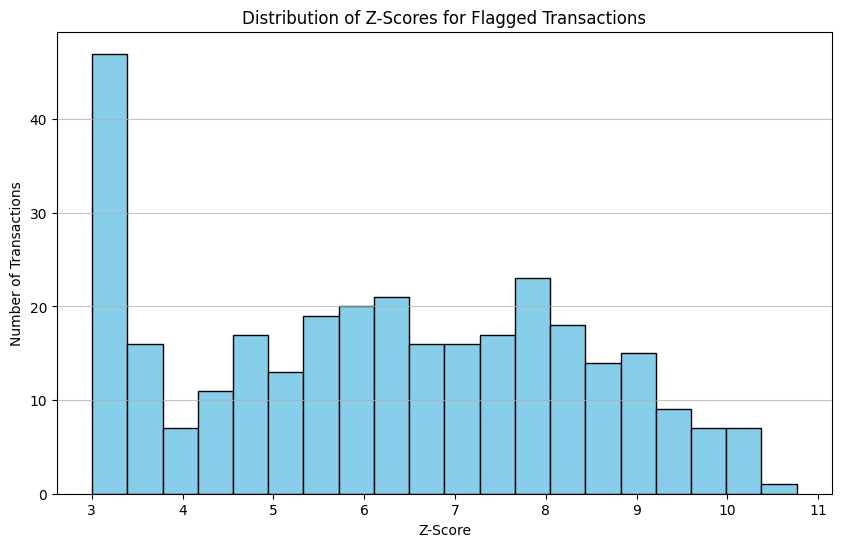

Generated a histogram showing the distribution of 314 Z-scores for flagged transactions.


In [ ]:
import matplotlib.pyplot as plt

# Extract Z-score values from flagged transactions
z_scores = [transaction['z_score'] for transaction in flagged_transactions]

print("\n--- Visualizing Z-score Distribution for Flagged Transactions ---")

# Create a histogram of the Z-score values
plt.figure(figsize=(10, 6))
plt.hist(z_scores, bins=20, edgecolor='black', color='skyblue')
plt.title('Distribution of Z-Scores for Flagged Transactions')
plt.xlabel('Z-Score')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', alpha=0.75)
plt.show()

print(f"Generated a histogram showing the distribution of {len(z_scores)} Z-scores for flagged transactions.")

In [ ]:
# Install mrjob and NLTK (VADER)
!pip install mrjob nltk --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.6/439.6 kB 9.7 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Option A: upload your file named `reviews.csv` (recommended)
# If you don't have a file, the script below will create a small sample file.
from google.colab import files
import os, io

print("If you have a reviews CSV, upload it now. Format: a header and a column named 'review' (CSV).")
print("If you don't upload a file, we'll create a sample 'reviews.csv' automatically.")

uploaded = files.upload()  # user can upload reviews.csv

if 'reviews.csv' not in uploaded:
    # create a sample file
    sample = """review_id,review
1,This product is excellent! I love it.
2,Worst purchase ever. Very disappointed.
3,It is okay — not great, not terrible.
4,Great value for money. Highly recommend.
5,It broke after a week. Not happy.
6,Average product. Works as expected.
"""
    with open('reviews.csv', 'w', encoding='utf-8') as f:
        f.write(sample)
    print("Sample reviews.csv created.")
else:
    print("reviews.csv uploaded.")

print("Current files:", os.listdir('.'))


If you have a reviews CSV, upload it now. Format: a header and a column named 'review' (CSV).
If you don't upload a file, we'll create a sample 'reviews.csv' automatically.


In [ ]:
# === Upload or auto-create reviews.csv ===
from google.colab import files
import pandas as pd

print("Upload your reviews CSV now (a column named 'review').")
print("If you skip upload, a sample dataset will be created automatically.")

uploaded = files.upload()

if len(uploaded) == 0:
    print("\nNo file uploaded. Creating sample reviews.csv...")
    sample_data = {
        "review": [
            "This product is excellent! I love it.",
            "Worst purchase ever. Very disappointed.",
            "It is okay — not great, not terrible.",
            "Great value for money. Highly recommend.",
            "It broke after a week. Not happy.",
            "Average product. Works as expected."
        ]
    }
    df = pd.DataFrame(sample_data)
    df.to_csv("reviews.csv", index=False)
else:
    # Save uploaded file with its original name, but also ensure a copy named reviews.csv exists
    file_name = list(uploaded.keys())[0]
    df = pd.read_csv(file_name)
    df.to_csv("reviews.csv", index=False)

print("\nFile ready: reviews.csv")
df.head()
